In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision.transforms import Compose
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import sys
import time
sys.path.append("../models")
from models.resnet import ResNet

In [ ]:
print(torch.__version__)

In [2]:
device = "cpu"

if torch.cuda.is_available():
    device = "cuda"

print(device)

cuda


In [17]:
train_transform = Compose([transforms.RandomHorizontalFlip(p=0.5),
                           transforms.RandomCrop(32, padding=4),
                           transforms.ToTensor(),
                           transforms.Normalize([0, 0, 0], [1, 1, 1])
                          ])

test_transform = Compose([transforms.ToTensor(),
                          transforms.Normalize([0, 0, 0], [1, 1, 1])
                         ])

cifar10_train = CIFAR10(root = "/data", train=True, download = True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=128, shuffle=True)

cifar10_test = CIFAR10(root = "/data", train=False, download = True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=128, shuffle=True)

cifar10 = CIFAR10(root = "/data", train=True, download = True)

y = cifar10.targets
X = cifar10.data

X_mean = torch.Tensor(np.mean(X,0))

print(X.shape)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)


In [18]:
Counter(y)
#uniform distribution

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [19]:
cifar10.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [20]:
def show_example(X, y, label, grid = (3,3)):
    y_label = [i for i, tag in enumerate(y) if label == tag]
    random.shuffle(y_label)
    
    rows = grid[0]
    columns = grid[1]
    
    fig, axes = plt.subplots(rows, columns)
    fig.set_figheight(7)
    fig.set_figwidth(7)
 
    for row in axes:
        for col in row:
            col.imshow(X[y_label.pop()])
    plt.show()

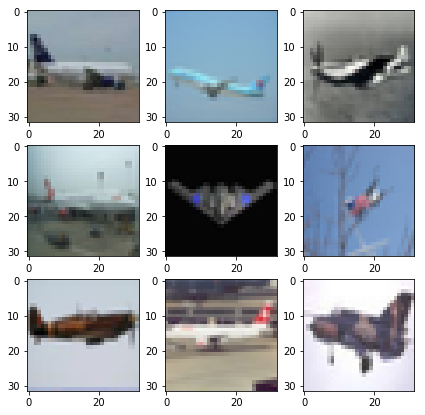

In [21]:
#airplane
show_example(X, y, 0)

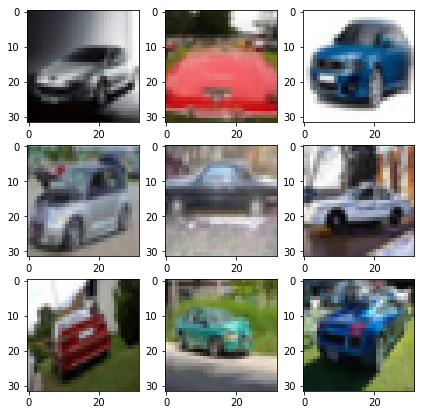

In [22]:
#automobile
show_example(X, y, 1)

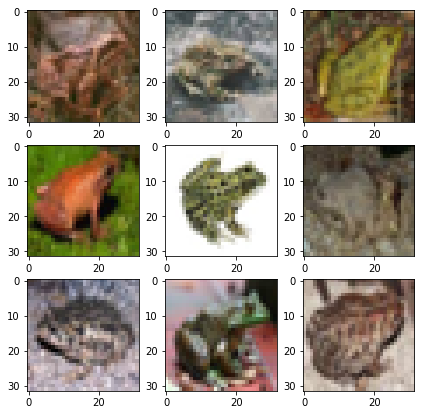

In [23]:
#frog
show_example(X, y, 6)

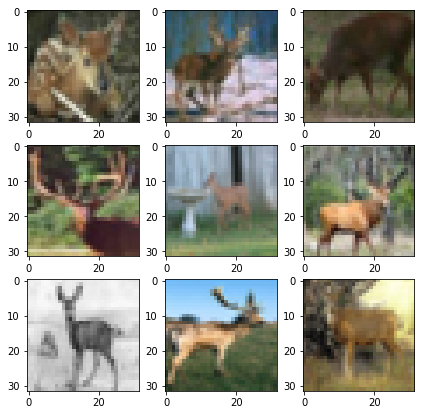

In [24]:
#deer
show_example(X, y, 4)

In [25]:
model = ResNet(32, 10)

In [26]:
test_input = torch.FloatTensor(X[0:1]).permute(0,3,2,1)
output = model(test_input)

In [27]:
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
LR = 0.001
optim = torch.optim.Adam(model.parameters(), lr = LR, weight_decay=0.0001)

In [28]:
EPOCHS = 20
epoch_loss = []
val_loss = []
acc = []
train_time = 0

In [ ]:

for i in range(EPOCHS):
    start_time = time.time()
    ep = 0
    model.train()
    for X_b, y_b in train_loader:
        optim.zero_grad()
        X_b = X_b.to(device)
        y_b = y_b.to(device)

        output = model(X_b)

        loss = loss_fn(output, y_b)

        loss.backward()
        ep += loss.item()
        optim.step()
    print("Epoch {0}: {1}".format(i+1, round(ep,2)))
    epoch_loss.append(ep)
    train_time += time.time() - start_time
    print(train_time)
    
    correct = 0
    total = 0
    val = 0
    model.eval()
    for X_b, y_b in test_loader:
        X_b = X_b.to(device)
        y_b = y_b.to(device)
        output = model(X_b)
        loss = loss_fn(output, y_b)
        val += loss.item()
        probs = torch.functional.F.softmax(output, 1)
        label = torch.argmax(probs, dim=1)
        correct += torch.sum(label == y_b).item()
        total += y_b.shape[0]
    val_loss.append(val)
    acc.append(round(correct/total,2))
    
    print("Accuracy: ", round(correct/10000,2), "Loss: ", round(val,1))

print("--- %s minutes ---", train_time)

Epoch 1: 750.99
524.781222820282
Accuracy:  0.45 Loss:  119.3


In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(EPOCHS), epoch_loss , color='r')
plt.plot(range(EPOCHS), val_loss, color='b')
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("No Augmentation")
ax.grid(True)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(EPOCHS), acc , color='g')
plt.legend(["Validation Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("No Augmentation")
ax.grid(True)

In [ ]:
no_aug = [895.7, 602.43, 490.93, 411.63, 349.29, 300.45, 256.92, 213.5, 174.24, 144.04, 117.22, 98.63, 77.69, 77.81]
paper = [732.75, 557.27, 463.47, 339.8]

In [ ]:
B.shape

In [ ]:
C.shape

In [ ]:
t4d = torch.empty(3, 3, 4, 2)

In [ ]:
t4d[:2, :2, :, :].shape

In [ ]:
torch.sub()